In [1]:
import re # for regular expressions 
import pandas as pd
pd.set_option("display.max_colwidth", 200) 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("vaccination2.csv") 
print ('Dataset size:', df.shape)
print ('Columns are:', df.columns)

Dataset size: (89973, 31)
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


In [3]:
#considering only the date, tweet and hashtags
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link',
'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

,date,tweet,hashtags
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[]
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - David Icke https://youtu.be/TulGwcqeyfE via @YouTube,[]
2,2019-10-03,"We have had our flu vaccination to protect our patients, staff and families - how u? @MFT_MRI https://twitter.com/l_ebah/status/1179740750508183552 …",[]
3,2019-10-03,"That's true, they are not, which is why there are known contraindications to vaccination. Docs know this stuff.",[]
4,2019-10-03,"Flu vaccination during pregnancy is safe, helps protect mothers from flu during pregnancy, and helps protect babies for several months after birth. This is important since babies under 6 months ca...",['#fluvax']
5,2019-10-03,"What did farmers make of the Badger Vaccination Deployment Project, and have their views changed over time? Our longitudinal analysis is out now. https://onlinelibrary.wiley.com/doi/10.1111/soru....","['#tbfree', '#badgercull']"
6,2019-10-03,"An employee at Turning Stone Resort Casino in Oneida County was diagnosed with infectious hepatitis A last week, forcing the hurried vaccination of some guests and workers http://bit.ly/2n9DUka ...",[]
7,2019-10-03,"#Nigeria: An outbreak of yellow fever is ongoing. Proof of vaccination is required to enter the country. If you travel to the area, consult a health care professional at least 6 weeks before your ...",['#nigeria']
8,2019-10-03,Impressive numbers! So pleased to continue supporting your teams with their #vaccination skills - brilliant result guys already!! Keeping your #communities protected 👍💉 https://twitter.com/daylewi...,"['#vaccination', '#communities']"
9,2019-10-03,⁦@DrBGellin⁩ @Sabin urging more #research at the interface of #vaccines and #AntibioticResistance at the ⁦@EU_Health⁩ Joint Action on Vaccination Summit in #Rome #VaccinesWork pic.twitter.com/H6RH...,"['#research', '#vaccines', '#antibioticresistance', '#rome', '#vaccineswork']"


In [4]:
print ('Dataset size:',df.shape) 
print ('Columns are:',df.columns) 
df.info ()

Dataset size: (89973, 3)
Columns are: Index(['date', 'tweet', 'hashtags'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      89973 non-null  object
 1   tweet     89973 non-null  object
 2   hashtags  89973 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [5]:
df["tweet"] = df["tweet"].astype(str)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True) 
df.info ()
df = df.sample(frac=.1, random_state=1111) 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      89973 non-null  datetime64[ns]
 1   tweet     89973 non-null  object        
 2   hashtags  89973 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 62925 to 77106
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      8997 non-null   datetime64[ns]
 1   tweet     8997 non-null   object        
 2   hashtags  8997 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 281.2+ KB


In [6]:
import string 
import nltk
from nltk.corpus import stopwords 
from nltk import re
MIN_YEAR = 1900
MAX_YEAR = 2100

In [7]:
def get_url_patern():
    return re.compile( r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))' r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0- 9]\.[^\s]{2,})')

In [8]:
def get_emojis_pattern(): 

    try:
# UCS-4
        emojis_pattern = re.compile(u'([\U00002600 \U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
# UCS-2
        emojis_pattern = re. compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern

def get_hashtags_pattern():
    return re.compile(r'#\w*')

def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')

def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')

def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')

def get_mentions_pattern():
    return re.compile(r'@\w*')

def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR): 
        return True
    else:
        return False

In [9]:
class TwitterPreprocessor:
    def __init__(self, text: str): 
        self.text = text
    def fully_preprocess(self): 
        return self \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_numbers()
    #if the pattern is found replace it with whatever is in repl or else return the same string 
    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text) 
        return self
    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation)) 
        return self
    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text) 
        return self
    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text) 
        return self
    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self
    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text) 
        return self
        
    def remove_stopwords(self, extra_stopwords=None): 
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english')) 
        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords: 
                new_sentence.append(w)
            self.text = ' '. join(new_sentence) 
            return self
 
    def remove_numbers(self, preserve_years=False): 
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)
        self.text = ' '. join(text_list) 
        return self
    def lowercase(self):
        self.text = self.text.lower() 
        return self
# Clean tweets and append to new column 
tweets = df['tweet']
clean_tweets = [] 
for tweet in tweets:
    c = TwitterPreprocessor((tweet)) 
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)

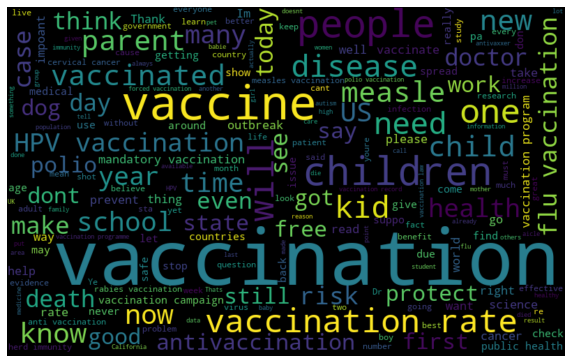

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\s\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\s\AppData\Local\Temp\ipykernel_17916\1303983859.py:26: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df,sentiment.apply(pd.Series)],1)


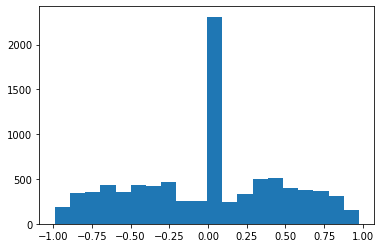

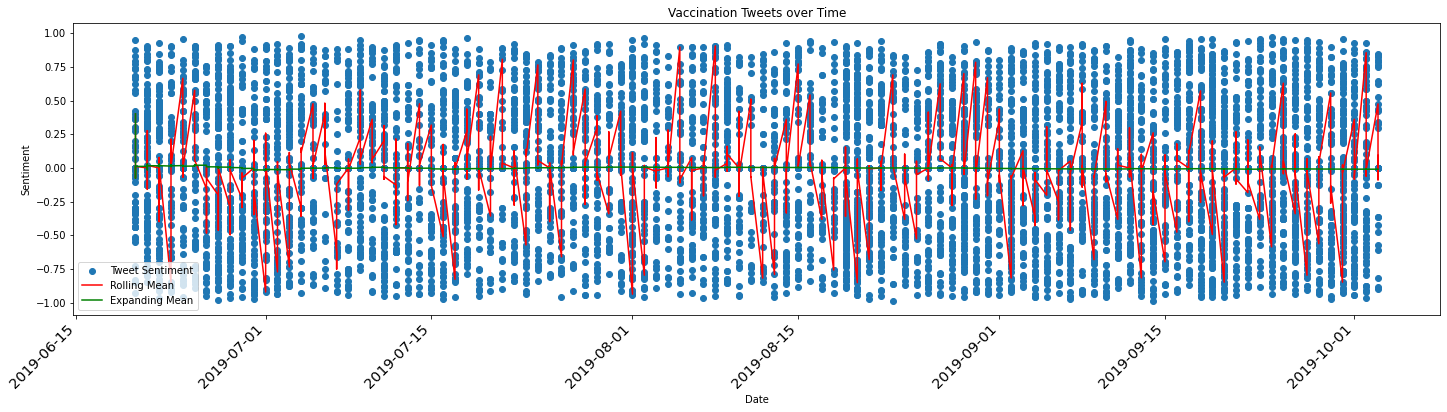

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


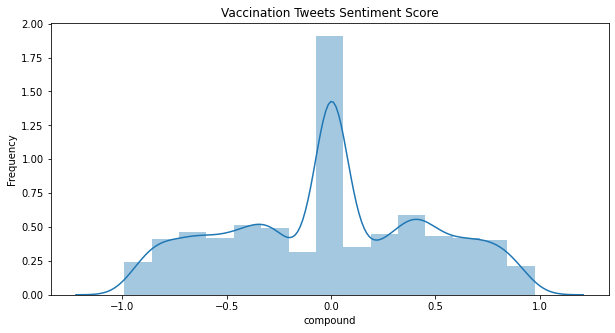

In [10]:


df['clean_tweets'] = clean_tweets 
df.head(5)

all_words = ' '.join([text for text in df['clean_tweets']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create analyzer object
analyzer = SentimentIntensityAnalyzer()

# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']] 
plt.hist(scores, bins=20)

sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x)) 
df = pd.concat([df,sentiment.apply(pd.Series)],1)
 
df.head(5) 
df.describe()
df.index = pd.to_datetime(df['date']) 
df = df.sort_index()
df['mean'] = df['compound']. expanding (). mean ()
df['rolling'] = df['compound']. rolling('1d'). mean ()

import datetime as dt
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['compound'], label='Tweet Sentiment') 
ax.plot(df['date'],df['rolling'], color ='r', label='Rolling Mean') 
ax.plot(df['date'],df['mean'], color='g', label='Expanding Mean')


ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment') 
ax.legend(loc='best')
fig.tight_layout() 
plt.xticks(
    rotation=45,
    horizontalalignment='right', 
    fontweight='light',
    fontsize='x-large'
)
plt.show()
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
ax.set(title='Vaccination Tweets Sentiment Score', xlabel='Compund Sentiment Score', 
ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax) 
plt.show()

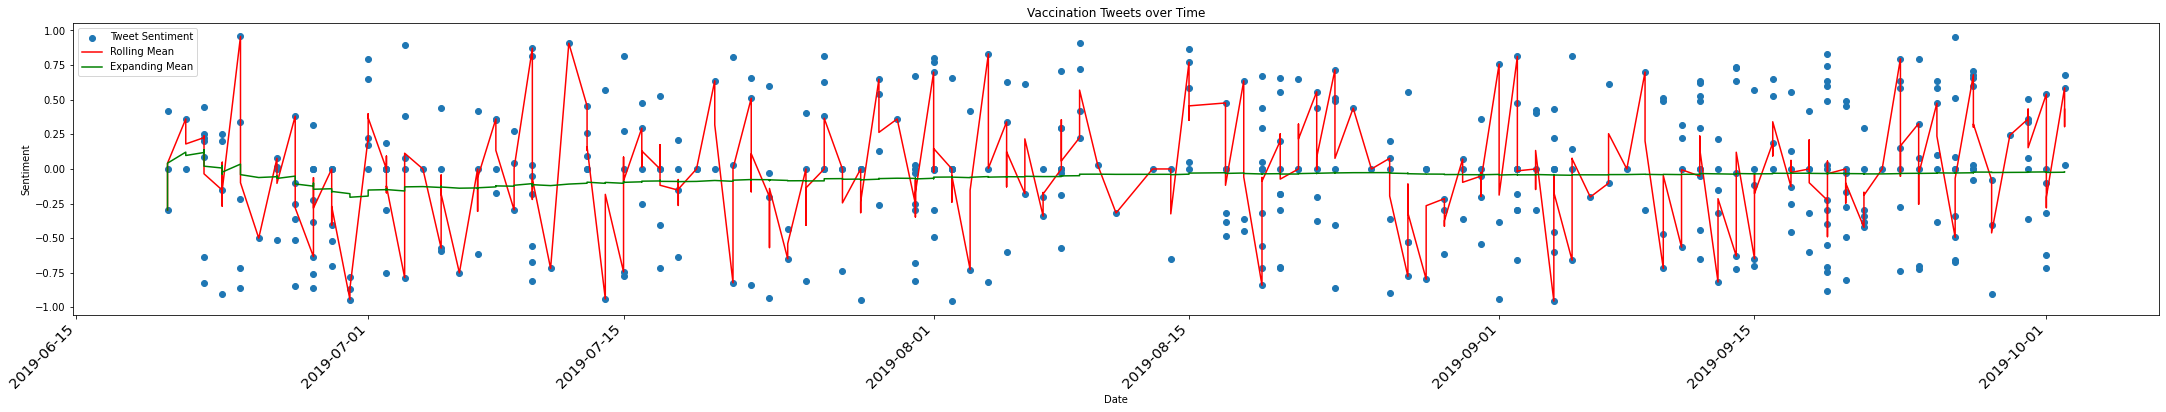

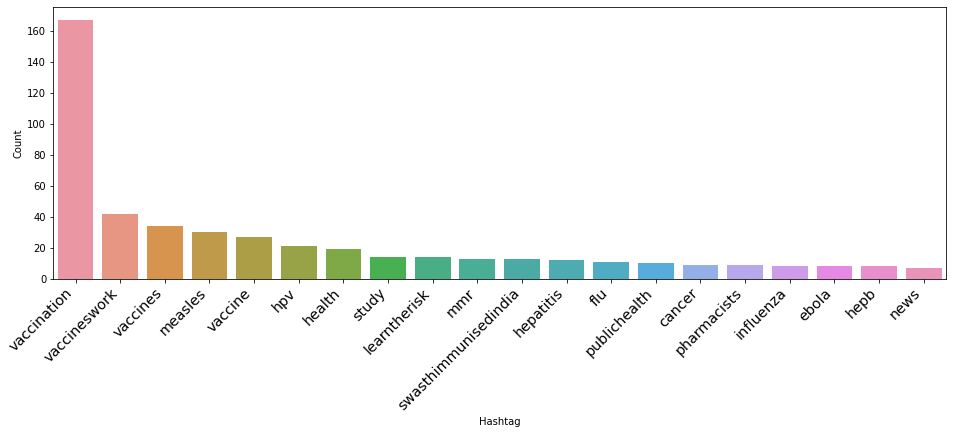

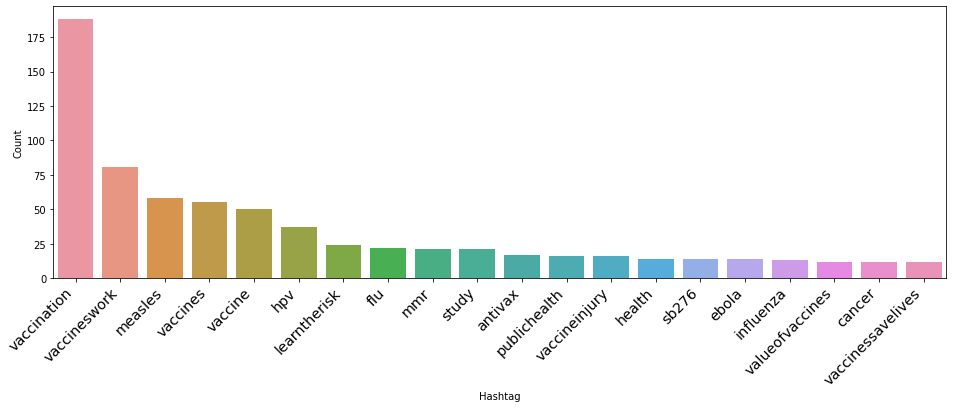

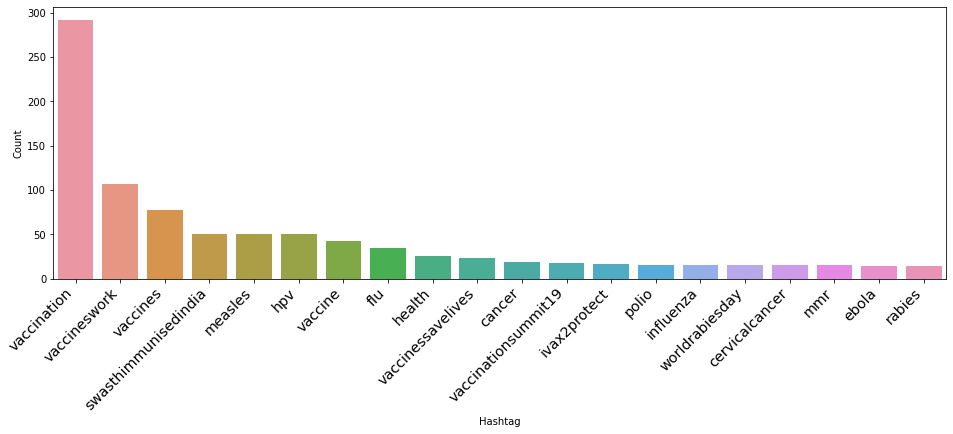

In [11]:
#Reduce noise
ot = df.sample(frac=.05, random_state=1111) 
ot.sort_index(inplace=True)
ot['mean'] = ot['compound']. expanding (). mean ()
ot['rolling'] = ot['compound']. rolling ('1d'). mean() 
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.scatter(ot['date'],ot['compound'], label='Tweet Sentiment') 
ax.plot(ot['date'],ot['rolling'], color ='r', label='Rolling Mean') 
ax.plot(ot['date'],ot['mean'], color='g', label='Expanding Mean')
ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment') 
ax.legend(loc='best')
fig.tight_layout() 
plt.xticks(
    rotation=45,
    horizontalalignment='right', 
    fontweight='light',
    fontsize='x-large'
 
)
plt.show()

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet 
    for i in x:
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht)
    return hashtags

# extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(df['hashtags'][df['compound'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df['hashtags'] [df['compound'] < 0])

# extracting hashtags from positive tweets
HT_positive = hashtag_extract(df['hashtags'] [df['compound'] > 0])

# unnesting list
HT_neutral = sum (HT_neutral,[]) 
HT_negative = sum (HT_negative,[]) 
HT_positive = sum (HT_positive,[]) 
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) # nlargest returns the first n rows ordered by columns in descending order.
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.xticks(
    rotation=45,
    horizontalalignment='right', 
    fontweight='light',
    fontsize='x-large'
)
plt.show()

#extracting hashtags from negative tweets 
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
 
plt.xticks(
    rotation=45,
    horizontalalignment='right', 
    fontweight='light',
    fontsize='x-large'
)
plt.show()
c = nltk.FreqDist(HT_positive)
f = pd.DataFrame({'Hashtag': list(c.keys()), 'Count': list(c.values())})




# selecting top 20 most frequent hashtags 
f = f.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=f, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.xticks(
    rotation=45,
    horizontalalignment='right', 
    fontweight='light',
    fontsize='x-large'
)
plt.show()